In [1]:
import zipfile
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", None)
from pipeline import Pipeline

/tmp/ipykernel_5918/2736457452.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#extracting the zip file
with zipfile.ZipFile("./../data/books_data.zip", "r") as zip_ref:
    zip_ref.extractall("./../data/")

In [13]:
#loading data
ratings_data = pd.read_csv("./../data/Ratings.csv")
books_data = pd.read_csv("./../data/Books.csv")
users_data = pd.read_csv("./../data/Users.csv")
#rename column to enable .column
ratings_data, books_data, users_data = Pipeline.rename_columns(ratings_data, 
                                            books_data, users_data)
#drop img urls
books_data = Pipeline.remove_img_urls(books_data)
print(ratings_data.shape)
print(books_data.shape)
print(users_data.shape)
user_item_matrix_size = books_data.shape[0]*users_data.shape[0]
print("User matrix size: ",user_item_matrix_size)
print("Matrix sparsity: ", ratings_data.shape[0]/user_item_matrix_size," %")

(1149780, 3)
(271360, 5)
(278858, 3)
User matrix size:  75670906880
Matrix sparsity:  1.5194478927328536e-05  %


/tmp/ipykernel_5918/3439591534.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_data = pd.read_csv("./../data/Books.csv")


# Ratings dataset cleaning/exploration

In [15]:
ratings_data.describe()

,userID,bookRating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [26]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   userID      1149780 non-null  int64 
 1   ISBN        1149780 non-null  object
 2   bookRating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [14]:
ratings_data.head(10)


,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


<Axes: >

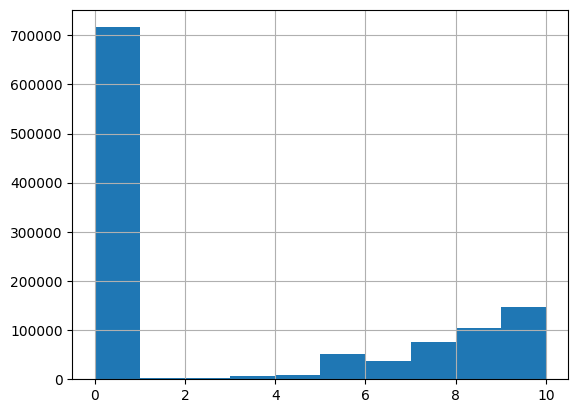

In [10]:
ratings_data.bookRating.hist()

In [24]:
implicit_count = len(ratings_data.loc[ratings_data.bookRating == 0])
explicit_count = len(ratings_data.loc[ratings_data.bookRating != 0])
print("Number of implicit feedbacks: ",implicit_count, " ~ ", 
    round(implicit_count/len(ratings_data),2),"%")
print("Number of explicit feedbacks: ", explicit_count, " ~ ",
    round(explicit_count/len(ratings_data),2),"%")

Number of implicit feedbacks:  716109  ~  0.62 %
Number of explicit feedbacks:  433671  ~  0.38 %


# Books dataset cleaning/exploration

In [5]:
#we do not have much info about the books such as genres
books_data.head(10)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
6,0425176428,What If?: The World's Foremost Military Historians Imagine What Might Have Been,Robert Cowley,2000,Berkley Publishing Group
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks
8,0679425608,Under the Black Flag: The Romance and the Reality of Life Among the Pirates,David Cordingly,1996,Random House
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner


In [27]:
#We have to fix dtypes
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   bookTitle          271360 non-null  object
 2   bookAuthor         271358 non-null  object
 3   yearOfPublication  271360 non-null  object
 4   publisher          271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [7]:
users_data.head(20)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0
